Mean transactions (Weekdays): 477.00941422594144
Mean transactions (Weekends): 298.93150684931504
Median transactions (Weekdays): 510.0
Median transactions (Weekends): 303.0
Standard deviation (Weekdays): 147.94464408124637
Standard deviation (Weekends): 162.54307610864026


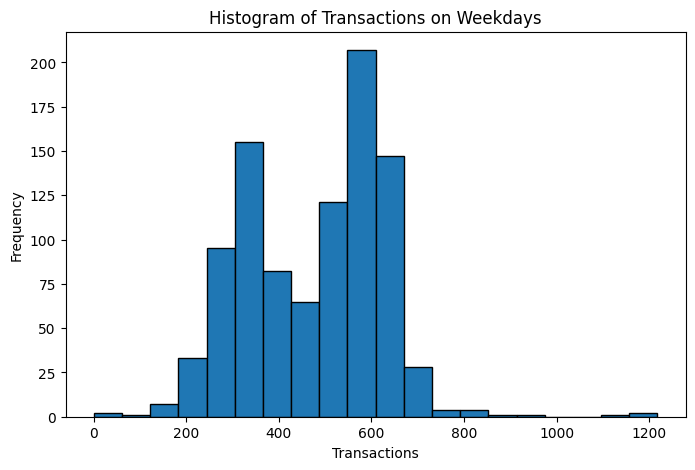

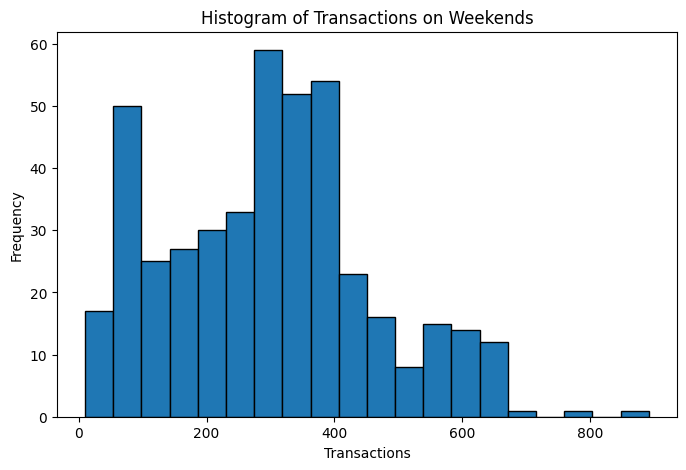

In [17]:
# Data Description
# Mean, Median, Standard Deviation
import pandas as pd
df = pd.read_csv('TransportationData.csv')
df.head()

# Calculate means
weekday_mean = df[df['Day Type'] == 'Weekdays']['Transactions'].mean()
weekend_mean = df[df['Day Type'] == 'Weekends']['Transactions'].mean()

print("Mean transactions (Weekdays):", weekday_mean)
print("Mean transactions (Weekends):", weekend_mean)

weekday_median = df[df['Day Type'] == 'Weekdays']['Transactions'].median()

# Median for weekends
weekend_median = df[df['Day Type'] == 'Weekends']['Transactions'].median()

print("Median transactions (Weekdays):", weekday_median)
print("Median transactions (Weekends):", weekend_median)

# Standard deviation for weekdays
weekday_std = df[df['Day Type'] == 'Weekdays']['Transactions'].std()

# Standard deviation for weekends
weekend_std = df[df['Day Type'] == 'Weekends']['Transactions'].std()

print("Standard deviation (Weekdays):", weekday_std)
print("Standard deviation (Weekends):", weekend_std)

#Histogram
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TransportationData.csv')

weekday_data = df[df['Day Type'] == 'Weekdays']['Transactions']
weekend_data = df[df['Day Type'] == 'Weekends']['Transactions']

# Weekday Histogram
plt.figure(figsize=(8,5))
plt.hist(weekday_data, bins=20, edgecolor='black')
plt.title('Histogram of Transactions on Weekdays')
plt.xlabel('Transactions')
plt.ylabel('Frequency')
plt.show()

# Weekend Histogram
plt.figure(figsize=(8,5))
plt.hist(weekend_data, bins=20, edgecolor='black')
plt.title('Histogram of Transactions on Weekends')
plt.xlabel('Transactions')
plt.ylabel('Frequency')
plt.show()



Pearson = -0.2576
Spearman = -0.2480
Linear Regression Model:
  Intercept: 475.7911
  Slope: -54.7344
  R-squared: 0.0664


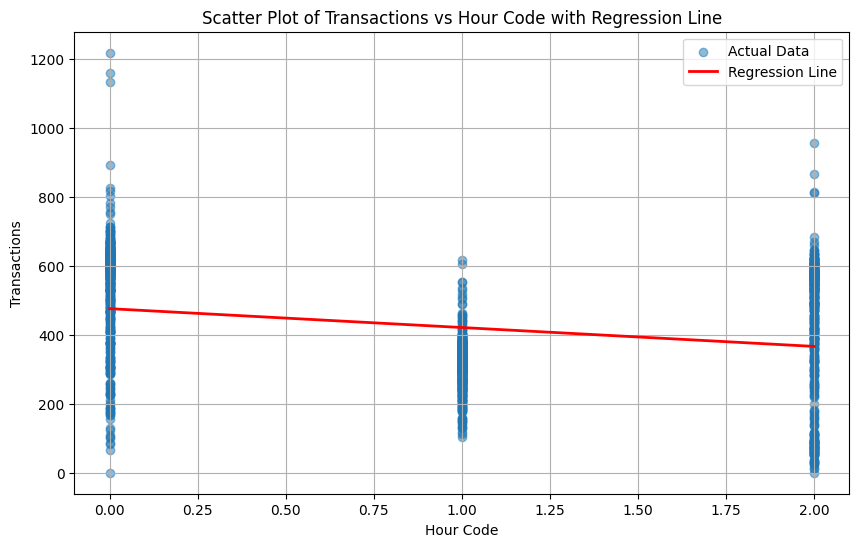

In [22]:
# Correlation
# Coefficients
import pandas as pd
from scipy.stats import pearsonr, spearmanr

df = pd.read_csv('TransportationData.csv')

# Convert Hour Slot into ordered numeric codes
df['Hour_Code'], uniques = pd.factorize(df['Hour Slot'], sort=True)

# Convert Transactions to numeric just to be safe
df['Transactions'] = pd.to_numeric(df['Transactions'], errors='coerce')

# Remove any missing data
clean_df = df.dropna(subset=['Hour_Code', 'Transactions'])

x = clean_df['Hour_Code']
y = clean_df['Transactions']

# Pearson correlation
pearson_corr, _ = pearsonr(x, y)

# Spearman correlation
spearman_corr, _ = spearmanr(x, y)

print(f"Pearson = {pearson_corr:.4f}")
print(f"Spearman = {spearman_corr:.4f}")

# Linear Regression
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv('TransportationData.csv')

df['Hour_Code'], uniques = pd.factorize(df['Hour Slot'], sort=True)

df['Transactions'] = pd.to_numeric(df['Transactions'], errors='coerce')

clean_df = df.dropna(subset=['Hour_Code', 'Transactions'])

X = clean_df[['Hour_Code']]   
y = clean_df['Transactions']  

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Linear Regression Model:")
print(f"  Intercept: {intercept:.4f}")
print(f"  Slope: {slope:.4f}")
print(f"  R-squared: {r_squared:.4f}")

# Scatter Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('TransportationData.csv')

df['Hour_Code'], uniques = pd.factorize(df['Hour Slot'], sort=True)

df['Transactions'] = pd.to_numeric(df['Transactions'], errors='coerce')

clean_df = df.dropna(subset=['Hour_Code', 'Transactions'])

X = clean_df[['Hour_Code']]
y = clean_df['Transactions']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(clean_df['Hour_Code'], clean_df['Transactions'], alpha=0.5, label='Actual Data')

plt.plot(clean_df['Hour_Code'], y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Hour Code')
plt.ylabel('Transactions')
plt.title('Scatter Plot of Transactions vs Hour Code with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

Explained Variance Ratio:
  PC1: 0.6288
  PC2: 0.3712

PCA Components (Loadings):
  PC1: [ 0.70710678 -0.70710678]
  PC2: [0.70710678 0.70710678]


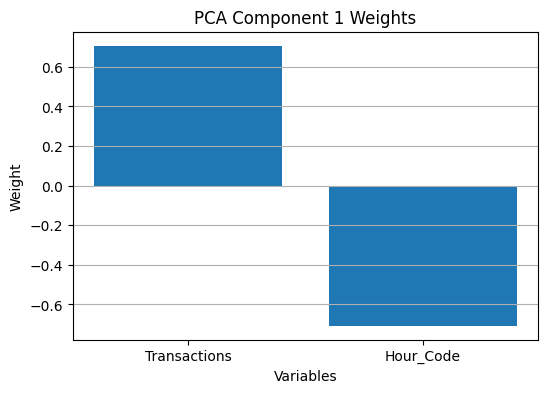

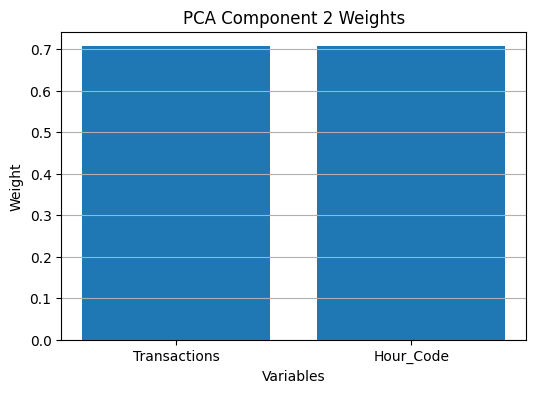

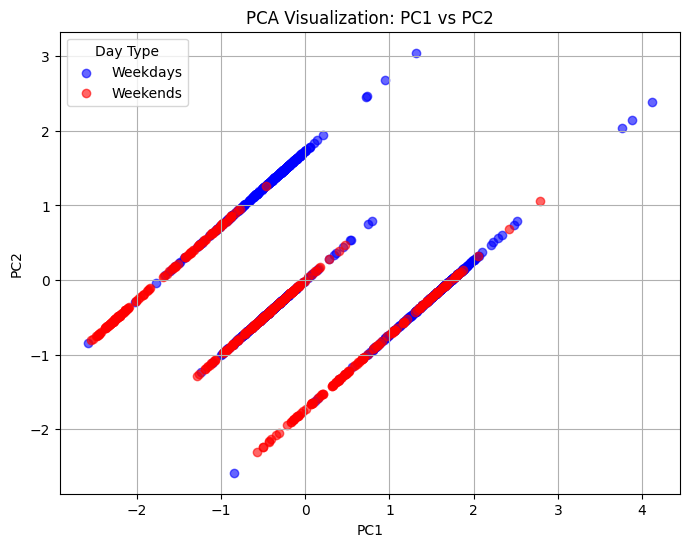

In [28]:
# Dimensionality Reduction 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('TransportationData.csv')

df['Hour_Code'], uniques = pd.factorize(df['Hour Slot'], sort=True)

df['Transactions'] = pd.to_numeric(df['Transactions'], errors='coerce')

quant_vars = df[['Transactions', 'Hour_Code']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quant_vars)

pca = PCA()
pca.fit(scaled_data)

explained_var = pca.explained_variance_ratio_
components = pca.components_

print("Explained Variance Ratio:")
for i, var in enumerate(explained_var):
    print(f"  PC{i+1}: {var:.4f}")

print("\nPCA Components (Loadings):")
for i, comp in enumerate(components):
    print(f"  PC{i+1}: {comp}")

# Bar Chart
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('TransportationData.csv')


df['Hour_Code'], uniques = pd.factorize(df['Hour Slot'], sort=True)

df['Transactions'] = pd.to_numeric(df['Transactions'], errors='coerce')

quant_vars = df[['Transactions', 'Hour_Code']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quant_vars)

pca = PCA()
pca.fit(scaled_data)

loadings = pca.components_

variables = quant_vars.columns


for i, comp in enumerate(loadings):
    plt.figure(figsize=(6,4))
    plt.bar(variables, comp)
    plt.title(f'PCA Component {i+1} Weights')
    plt.xlabel("Variables")
    plt.ylabel("Weight")
    plt.grid(axis='y')
    plt.show()
    
#Visualize your Data
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('TransportationData.csv')

df['Hour_Code'], uniques = pd.factorize(df['Hour Slot'], sort=True)

df['Transactions'] = pd.to_numeric(df['Transactions'], errors='coerce')

quant_vars = df[['Transactions', 'Hour_Code']].dropna()

quant_vars_index = quant_vars.index

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quant_vars)

pca = PCA(n_components=2)
pca_scores = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame({
    'PC1': pca_scores[:, 0],
    'PC2': pca_scores[:, 1],
    'Day Type': df.loc[quant_vars_index, 'Day Type'].values
})

plt.figure(figsize=(8,6))

colors = {'Weekdays':'blue', 'Weekends':'red'}

for category in colors:
    subset = pca_df[pca_df['Day Type'] == category]
    plt.scatter(subset['PC1'], subset['PC2'], 
                c=colors[category], label=category, alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization: PC1 vs PC2')
plt.legend(title="Day Type")
plt.grid(True)
plt.show()